# Parallelizing Neural Network Training with PyTorch

## Introduction
PyTorch is one of the most popular deep learning libraries currently available, and it lets us implement neural networks (NNs) much more efficiently than any any manual NumPy implementations.

## Performance challenges
When executing a normal python program, Python is limited to execution on one core due to the global **interpreter lock (GIL)**. So although we indeed take advantage of Python’s mul-
tiprocessing library to distribute our computations over multiple cores, we still have to consider that the most advanced desktop hardware rarely comes with more than 8 or 16 such cores.

When implemnting a **simple multilayer perceptron from scratch** using numpy that processes a data set like MNIST (hand written digits) with only one hidden layer consisting of 100 units. We had to optimize approximately 80,000 weight parameters knowing that images in MNIST are rather small (28×28) and we can only imagine the explosion in the number of parameters if we wanted to add **additional hidden layers** or work with images that have **higher pixel densities**.

Solution : use GPUs here is an example for why :
<img src="images/Chapter12/gpu-cpu-comp.png"/>

***Memory bandwidth*** : The GPU's memory bandwidth determines how fast it can move data from/to memory (vRAM) to the computation cores.

***FLOPS***: floating point operations per second

To improve the performance of training machine learning models, PyTorch allows execution on CPUs,GPUs, and XLA devices such as TPUs. However, its greatest performance capabilities can be discovered when using GPUs and XLA devices.

## How is pytorch built
PyTorch is built around a **computation graph** composed of a **set of nodes**. Each node represents an operation that may have zero or more inputs or outputs. PyTorch provides an imperative programming environment that evaluates operations, executes computation, and returns concrete values immediately. Hence, the **computation graph in PyTorch is defined implicitly**, rather than *constructed in advance and executed after*.

<img src="images/Chapter12/cg.png"/>


## But what is a tensor ?
Mathematically, it is a generalization of a vector (in a vector space) where we can see a scalar as a rank0 tensor, vector as a rank1 tensor, matrix as a rank2 tensor and so on ..
<img src="images/Chapter12/tensors-types.png"/>

## Steps toward learning pytorch
### Basics of pytorch
- creating and manipulating tensors
- loading data ``data using torch.utils.data``
- using some ready to use datasets using ``torch.utils.data.Dataset``
### Getting our feet wet with pytorch
- discovering ``torch.nn`` module
- building machine learning models (composing and training the models)
- save the trained models on disk for future evaluation

## Creating tensors in PyTorch

In [1]:
import torch
import numpy as np

In [2]:
#creating tensor from lists and numpy arrrays
a = [1, 2, 3]
b = np.array([4,5,6], dtype=np.int32)
t_a = torch.tensor(a) #from list
t_b = torch.from_numpy(b) #from numpy arrays
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
#some similar functions to numpy
t_ones = torch.ones(2, 3)#zeros(2,3)
print(t_ones.shape)
print(t_ones)

torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
#using rand()
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.6036, 0.8930, 0.7314],
        [0.6624, 0.7943, 0.8132]])


In [5]:
#modifying datatype using to() method
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)
"""
see all datatypes
https://pytorch.org/docs/stable/tensor_attributes.html
"""

torch.int64


'\nsee all datatypes\nhttps://pytorch.org/docs/stable/tensor_attributes.html\n'

### Redimensionning tensors
We'll be meeting some operations that require that the input tensors have a certain number of dimensions (rank)

In [6]:
#get transpose
t = torch.rand(3, 5) #create a (3,5) matrix (tensor-rank2) with random values
t_tr = torch.transpose(t, 0, 1)
print(t)
print(t.shape, ' -transpose-> ', t_tr.shape)
print(t_tr)

tensor([[0.3028, 0.0675, 0.5809, 0.7971, 0.0018],
        [0.1044, 0.3654, 0.3295, 0.4925, 0.0274],
        [0.1267, 0.7853, 0.8563, 0.4698, 0.4432]])
torch.Size([3, 5])  -transpose->  torch.Size([5, 3])
tensor([[0.3028, 0.1044, 0.1267],
        [0.0675, 0.3654, 0.7853],
        [0.5809, 0.3295, 0.8563],
        [0.7971, 0.4925, 0.4698],
        [0.0018, 0.0274, 0.4432]])


In [7]:
#reshaping a vector 1
t = torch.zeros(30) #creating a 1d-vector (rank 1 tensor) of 30 element
t_reshape = t.reshape(5, 6) #condition : 5*6 = 30
t.reshape(5, 6) #reshape() method doesn't affect the tensor it returns a new one

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [8]:
#reshaping a vector 2
t = torch.zeros(30) #creating a 1d-vector (rank 1 tensor) of 30 element
t_reshape = t.reshape(5,3,2) #condition : 5*3*2 = 30 1D-->3D tensor
t_reshape #reshape() method doesn't affect the tensor it returns a new one

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

In [9]:
#getting rid of unnecessary dimensions (1)
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t)
print(t.shape, ' --> ', t_sqz.shape)
t_sqz

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([2, 4])


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [10]:
#getting rid of unnecessary dimensions (2)
t = torch.zeros(1, 2, 1, 4, 1)
dim = 1 
t_sqz = torch.squeeze(t,dim) #squeeze the dim only if it has the dimention 1
print(t.shape, ' --> ', t_sqz.shape)
t_sqz

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 1, 4, 1])


tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]])

## Applying mathematical operations to tensors

In [11]:
#init random seed
torch.manual_seed(1)

In [12]:
#generate random matrices with different distributions
t0 = torch.rand(5, 2) #torch.rand(dim1,dim2,...) -> uniform distribution [0-1]
t1 = 2 * t0 - 1 #broadcast the sub operation
t2 = torch.normal(mean=0, std=1, size=(5, 2)) # torch.normal(dim1,dim2,...,dimn) ->normal distribution with mean 'mean' and standard deviation 'std'
print(t0)
print(t1)
print(t2)

tensor([[0.7576, 0.2793],
        [0.4031, 0.7347],
        [0.0293, 0.7999],
        [0.3971, 0.7544],
        [0.5695, 0.4388]])
tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [13]:
#element wise multiplication
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [14]:
#mean of the matrix + explaination of axis & keepdims
print(t1.shape)
t4 = torch.mean(t1,axis=0)#the dimension is collapsed 
print(t4)
t4_5 = torch.mean(t1,axis=0,keepdims=True)#keepdims is equivalent as leaving the rank of the tensor as it is
print(t4_5)

torch.Size([5, 2])
tensor([-0.1373,  0.2028])
tensor([[-0.1373,  0.2028]])


In [15]:
#matrix multiplication | transpose(input,first_dim_index,second_dim_index)
#transpose is just a swapping operation so in multidimentional matrix we must choose two
t5 = torch.matmul(t1,torch.transpose(t2,0,1)) 
t5

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [16]:
t6 = torch.matmul(torch.transpose(t1,0,1),t2)
t6

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

In [17]:
#using norms
print(t1.shape)
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
norm_t1

torch.Size([5, 2])


tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

## Split, stack, and concatenate tensors

In [18]:
#split tensors into chunks
#turned out that tensors can be transformed into numpy arrays
t = torch.rand(6)
print("initial tensor : \n",t)
t_splits = torch.chunk(t, 3)
print("splits of the tensor:\n",t_splits)
type(t_splits)
#put items of the tuple in as arraylist in a
[item.numpy() for item in t_splits]

initial tensor : 
 tensor([0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588])
splits of the tensor:
 (tensor([0.6397, 0.9743]), tensor([0.8300, 0.0444]), tensor([0.0246, 0.2588]))


[array([0.63968194, 0.97427773], dtype=float32),
 array([0.8300299 , 0.04443115], dtype=float32),
 array([0.0245958 , 0.25883394], dtype=float32)]

In [19]:
t = torch.rand(5)
print("intial tensor : \n",t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])#condition the sum of elements
print("splits of the tensor:\n",t_splits)
type(t_splits)
#put items of the tuple in as arraylist in a
[item.numpy() for item in t_splits]

intial tensor : 
 tensor([0.9391, 0.4167, 0.7140, 0.2676, 0.9906])
splits of the tensor:
 (tensor([0.9391, 0.4167, 0.7140]), tensor([0.2676, 0.9906]))


[array([0.93905586, 0.4167155 , 0.7139797 ], dtype=float32),
 array([0.2676443, 0.990609 ], dtype=float32)]

In [20]:
#concatenating tensors using cat and stack

A = torch.ones(3)
B = torch.zeros(3)
print(A.shape)
print(A)
print(B.shape)
print(B)

C = torch.cat([A, B], axis=0)#[-1, 0]
print(C)

torch.Size([3])
tensor([1., 1., 1.])
torch.Size([3])
tensor([0., 0., 0.])
tensor([1., 1., 1., 0., 0., 0.])


In [21]:
#concatenating tensors using cat and stack
#[A, B] or (A,B) 
A = torch.ones(3,1)
B = torch.zeros(3,1)
print(A.shape)
print(A)
print(B.shape)
print(B)

C = torch.cat([A, B], axis=-1)#[-1, 0]
D = torch.cat([A, B], axis=0)
print("C :\n",C)
print("D :\n",D)

torch.Size([3, 1])
tensor([[1.],
        [1.],
        [1.]])
torch.Size([3, 1])
tensor([[0.],
        [0.],
        [0.]])
C :
 tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
D :
 tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])


In [22]:
A = torch.ones(3,1)
B = torch.zeros(3,1)
print(A.shape)
print(A)
print(B.shape)
print(B)

C = torch.cat([A, B], axis=-1)#[-1, 0]
D = torch.cat((A, B), axis=0)
print("C :\n",C)
print("D :\n",D)

torch.Size([3, 1])
tensor([[1.],
        [1.],
        [1.]])
torch.Size([3, 1])
tensor([[0.],
        [0.],
        [0.]])
C :
 tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
D :
 tensor([[1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]])


In [23]:
#with stack we can higher the dimension but must mention the axisi we are getting to
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)#here knowing that A is rank1 3 element tensor & same goes for B we can increase the dimension
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in Pytorch
- When training a deep NN, we use iterative optimisation algorithm such as stochastic gradient decent (or partially iterative such as batch gradient decent).
- ``torch.nn`` is a module for building NN models
- When dataset is small --> load into memory
- When dataset is too large we need to load data from the main storage device in chunks batch by batch (we use this term instead of **mini-batch** following the tensorflow terminology)
- input pipline means making multiple layers that perform automatically multiple tasks such as **data preprocessing : mean,centering,scaling or even adding noise to the training procedure to prevent overfitting**

PyTorch provides a special class for constructing preprocessing pipeline

In [24]:
#Creating a PyTorch DataLoader from existing tensors
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)#generate a 1-rank tensor from 0 to 5
data_loader = DataLoader(t)
data_loader

In [25]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [26]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


## Combining two tensors into a joint dataset
Usecase : we could have a tensor for features and a tensor for labels, we need to build a dataset that combines these tensors, which will allow us to retrieve the elements of these tensors in tuples.

We can do that either by :
- Creating a class that inherits from the class ``Dataset`` (when we want to pre-treat the data)
- import predefined classes such as ``TensorDataset``

In [27]:
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [28]:
from torch.utils.data import Dataset
#creating a custom dataset manually
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return (self.x)
        
    def __getitem__(self, idx):#return the corresponding item
        return self.x[idx], self.y[idx]

In [29]:
from torch.utils.data import TensorDataset
 
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('x: ', example[0], 'y: ', example[1])

x:  tensor([0.7570, 0.2346, 0.6471]) y:  tensor(0)
x:  tensor([0.3556, 0.4452, 0.0193]) y:  tensor(1)
x:  tensor([0.2616, 0.7713, 0.3785]) y:  tensor(2)
x:  tensor([0.9980, 0.9008, 0.4766]) y:  tensor(3)


## Shuffle, batch, and repeat
When training an NN model using stochastic gradient descent optimization, it is important to feed training data as randomly shuffled batches.
Here are the steps :
- creating a data loader using the class ``DataLoader``
- DataLoader' constructor takes into parameters Dataset object,batch_size (int), shuffle (boolean).

In [30]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],'\n y:', batch[1])

batch 1: x: tensor([[0.9980, 0.9008, 0.4766],
        [0.3556, 0.4452, 0.0193]]) 
 y: tensor([3, 1])
batch 2: x: tensor([[0.2616, 0.7713, 0.3785],
        [0.7570, 0.2346, 0.6471]]) 
 y: tensor([2, 0])


The rows are **shuffled** without **losing the one-to-one correspondence between the entries in x and y**.
In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs. So, let’s iterate over the batched dataset twice:

In [31]:
for epoch in range(2):
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],'\ny:', batch[1])

#stuff i did not cover yet:
#sampler=SequentialSampler(my_dataset),
#     num_workers=4,
#     pin_memory=True

batch 1: x: tensor([[0.9980, 0.9008, 0.4766],
        [0.2616, 0.7713, 0.3785]]) 
y: tensor([3, 2])
batch 2: x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
y: tensor([0, 1])
batch 1: x: tensor([[0.2616, 0.7713, 0.3785],
        [0.9980, 0.9008, 0.4766]]) 
y: tensor([2, 3])
batch 2: x: tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193]]) 
y: tensor([0, 1])


### Recap :
<img src="images/Chapter12/dataset-dataloader.png"/>

## Creating a dataset from files on your local storage disk
### Creating an Image dataset
***Usecase :*** images from directories

In [32]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpeg')])
print(file_list)

['cat_dog_images/cat-01.jpeg', 'cat_dog_images/cat-02.jpeg', 'cat_dog_images/cat-03.jpeg', 'cat_dog_images/dog-01.jpeg', 'cat_dog_images/dog-02.jpeg', 'cat_dog_images/dog-03.jpeg']


Image shape: (183, 275, 3)
Image shape: (225, 225, 3)
Image shape: (183, 275, 3)
Image shape: (224, 225, 3)
Image shape: (183, 275, 3)
Image shape: (183, 275, 3)


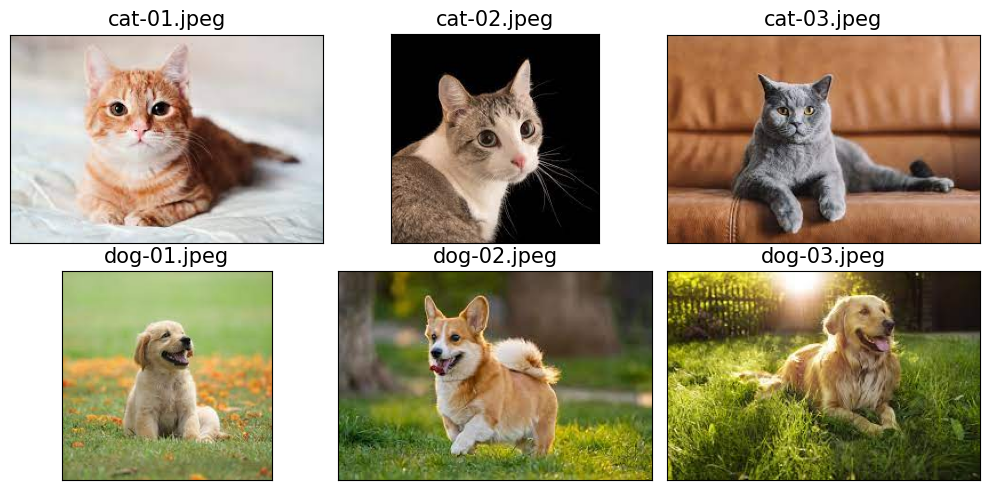

In [33]:
#visualize images
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [34]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


### Now let's create a dataset out of those images

In [35]:
class ImageDataset(Dataset):
    def __init__(self, file_list,labels):# x(inputs : path_file_list),y (label :0 or 1)
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label # gets the name of the file and its value

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpeg 0
cat_dog_images/cat-02.jpeg 0
cat_dog_images/cat-03.jpeg 0
cat_dog_images/dog-01.jpeg 1
cat_dog_images/dog-02.jpeg 1
cat_dog_images/dog-03.jpeg 1


### Let's add a layer of image transforming :

In [36]:
#create the function transformation
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),# transform image to tensors
    transforms.Resize((img_height, img_width)),# resize it
])

In [37]:
class ImageDataset(Dataset):
    def __init__(self, file_list,labels,transform=None):# x(inputs : path_file_list),y (label :0 or 1)
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
        
    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels,transform)

/home/rayane/pytorch-zero-to-hero/.venv/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


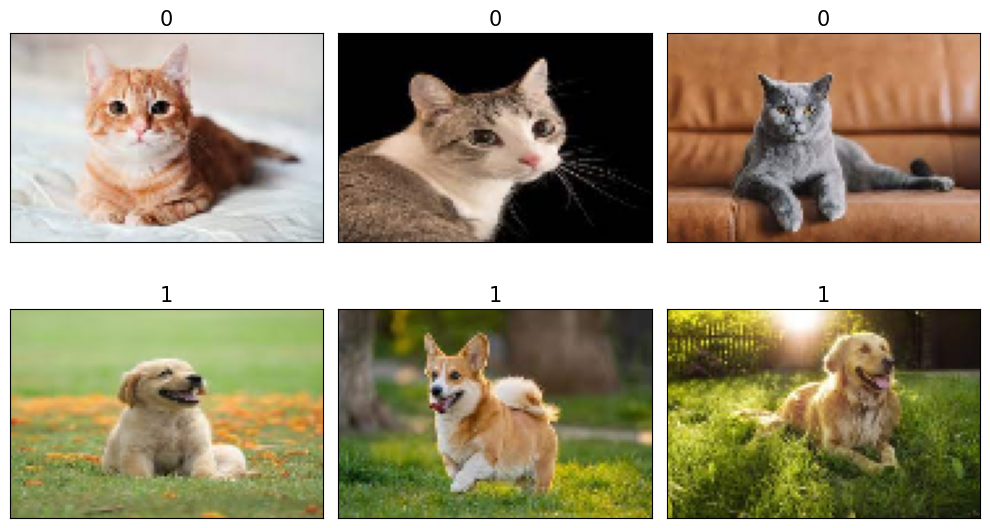

In [38]:
#visualization of figures in dataset
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

## Enough of collecting data manually ! let's use some datasets
- CelebA dataset
    - The database has three subsets, 'train', 'valid', and 'test'. We can select a specific subset or load all of them with the split parameter.
    - The images are stored in PIL.Image format. And we can obtain a transformed version using a custom transform function, such as ``transforms.ToTensor`` and ``transforms.Resize``
    - There are different types of targets we can use, including **'attributes'**, **'identity'**, and **'landmarks'**. **'attributes'** is 40 facial attributes for the person in the image, such as **facial expression**, **makeup**, **hair properties**, and so on; **'identity'** is the person ID for an image; and **'landmarks'** refers to the dictionary of extracted facial points, such as the position of the eyes, nose, and so on.

In [39]:
import torchvision
image_path = "./mnist_images"

In [40]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train',download=False)

(<PIL.Image.Image image mode=L size=28x28 at 0x7F0539C98310>, 5)


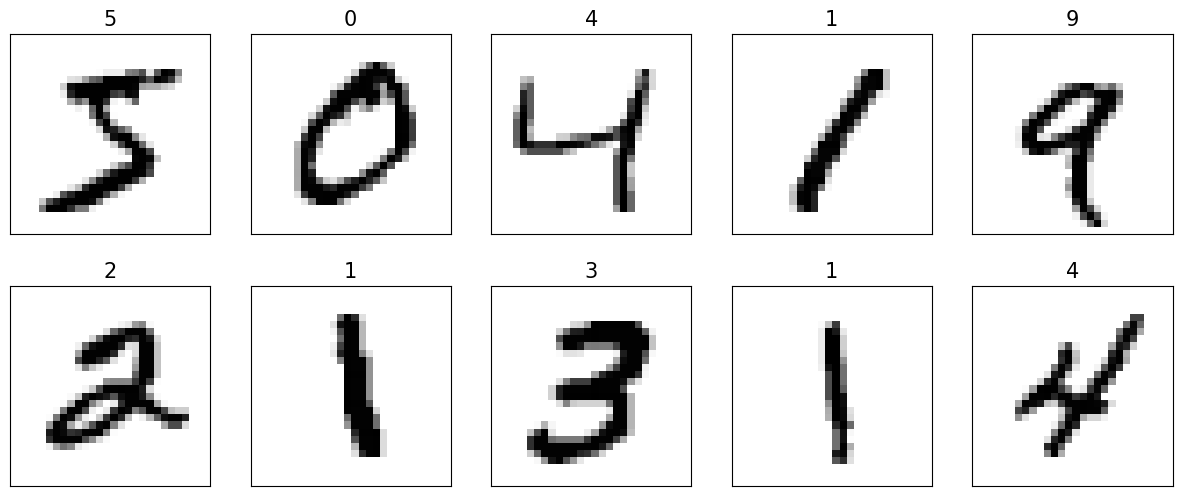

In [41]:
from itertools import islice


assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)
plt.show()

## Building an NN model in PyTorch
### The PyTorch neural network module (torch.nn)
- we will understand how it works by first building a basic linear regression model on a toi dataset without using any feature
- Then, we will incrementally add features from ``torch.nn`` and ``torch.optim``
- We will also take advantage of the dataset pipeline functionalities supported in PyTorch, such as ``Dataset`` and ``DataLoader``
- most commonly used approach for building an NN in PyTorch is through ``nn.Module``
- We will see how a trained model can be saved and reloaded for future use.

### Building a linear regression model

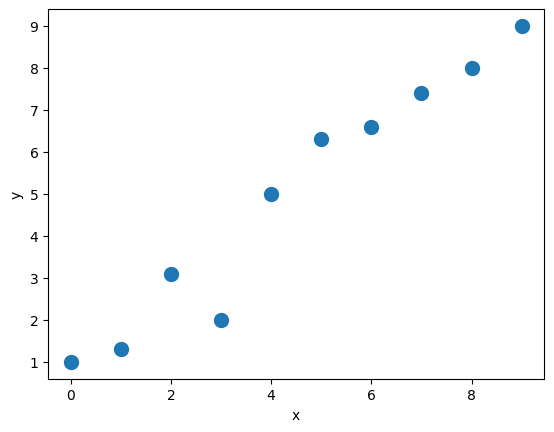

In [94]:
#creating a basic dataset
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
                    6.3, 6.6,7.4, 8.0,
                    9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [95]:
#import the Dataset class that will be used to train 
from torch.utils.data import TensorDataset

#standardize the features (centrer et reduire) the dataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
#transform the input into tensors 
X_train_norm = torch.from_numpy(X_train_norm)
#transform the output into tensors
y_train = torch.from_numpy(y_train).float()

#create the new dataset using a Dataset class (in our simple case TensorDataset)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
#from this dataset let's create a dataloader
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [96]:
#define a model from scratch
# in our case the model is z = w*x+b where w is a scalar (rank-0 tensor)
weight = torch.randn(1)
weight.requires_grad_() # this will tell pytorch to record operations on this var for back prop
                        # this will also make it immune to any changes except by pytorch backward
                        # or the pytorch.no_grad 
bias = torch.zeros(1, requires_grad=True)

In [97]:
#defining the model
def model(xb):
    return xb @ weight + bias

In [98]:
#define the loss function
def loss_fn(predictions, labels):# MSE (mean squared error),where input & target are two tensors
    return (predictions-labels).pow(2).mean()

In [99]:
learning_rate = 0.001
num_epochs = 200 # number of times we swipe the dataset
log_epochs = 10 # every each 10 epoch we print (log)
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl: #for each x,y in train dataloader
        pred = model(x_batch) #predict
        loss = loss_fn(pred, y_batch.long())#calculate loss
        loss.backward() # calculate gradient of the variables based
                        # and affect it to weight.grad,bias.grad or any tensor having require_grad == true
    
    with torch.no_grad(): #deactivating the grad functionality to update our parameter manually
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 6.3083
Epoch 10 Loss 3.2259
Epoch 20 Loss 1.6572
Epoch 30 Loss 10.8415
Epoch 40 Loss 0.4653
Epoch 50 Loss 5.9352
Epoch 60 Loss 2.3135
Epoch 70 Loss 3.1034
Epoch 80 Loss 1.4226
Epoch 90 Loss 1.1494
Epoch 100 Loss 0.4667
Epoch 110 Loss 0.0566
Epoch 120 Loss 0.4368
Epoch 130 Loss 0.0447
Epoch 140 Loss 0.0566
Epoch 150 Loss 0.4811
Epoch 160 Loss 0.1812
Epoch 170 Loss 0.0003
Epoch 180 Loss 0.2130
Epoch 190 Loss 0.7107


In [100]:
print('Final Parameters:', weight.item(), bias.item())
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)

Final Parameters: 2.650876760482788 4.715577602386475


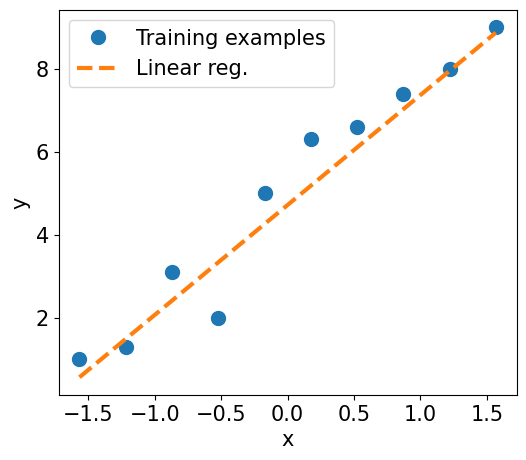

In [101]:
#plotting the result
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [118]:
import torch.nn as nn
#defining the loss function using predefined loss functions
loss_fn = nn.MSELoss(reduction='mean')
#mentioning the type of the model (in our case linear regression)
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
#applying an optimization method : stochastic gradient decent (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [119]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:,0]
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')
print('Final Parameters:', model.weight.item(), model.bias.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x4 and 1x1)

## Building a multilayer perceptron for classifying flowers in the Iris dataset

In [122]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1./3,random_state=1)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

#creating tensors out of numpy vectors
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)


In [123]:
#creating the dataset
train_ds = TensorDataset(X_train_norm,y_train)
#creating the dataloader
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [124]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) #fully connected layer Linear : w*x + b
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x): #forward propagation
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

#creating an instance of the model
model = Model(input_size,hidden_size,output_size)

In [125]:
#defining other stuff that comes with module
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [126]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)#predict
        loss = loss_fn(pred, y_batch) #calculate the loss
        loss.backward() # calculate the gradient of each parameter
        optimizer.step() # update the weights based on the gradient
        optimizer.zero_grad() # reset the gradient to 0
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

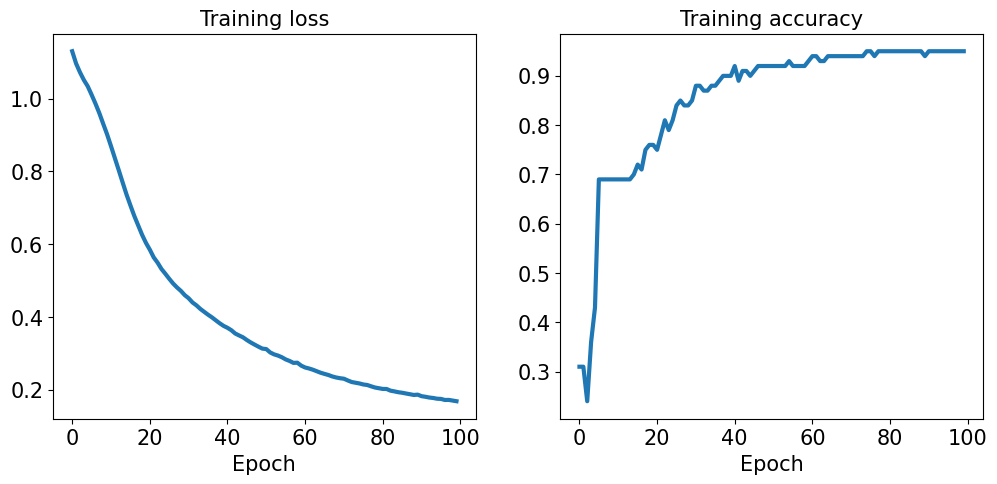

In [127]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [144]:
# Assuming you have already defined your model and have X_test and y_test
# Normalize X_test
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

# Convert X_test_norm and y_test to tensors
X_test_norm = torch.tensor(X_test_norm, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

# Make predictions using your model
pred_test = model(X_test_norm)

# Calculate accuracy
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

# Print the test accuracy
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.9800


/tmp/ipykernel_3245/959402323.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.int64)


## Recap from all what is above
<img src="images/Chapter12/recap_algorithms.png"/>

In [146]:
path = 'models/iris_classifier.pt' ## needs to be created
torch.save(model, path)

In [147]:
model_new = torch.load(path)

In [148]:
model_new.eval() #bias means b in w*x + b

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [149]:
pred_test = model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [150]:
#If you want to save only the learned parameters 
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [151]:
#reimport the parameters
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>